<a href="https://colab.research.google.com/github/JuanmLopezA/Data/blob/main/GeneradorNext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[100003, 100019, 100043, 100049, 100057]
[562613, 1611189, 2659765, 3708341, 4756917, 5805493, 6854069, 7902645, 8951221, 9999797]
[[562613, 1611189], [562613, 2659765], [562613, 3708341], [562613, 4756917], [562613, 5805493], [562613, 6854069], [562613, 7902645], [562613, 8951221], [562613, 9999797]]
****************************************************************************************************
Semilla : 749453
Constante multiplicativa : 751183
Constante aditiva : 5994063
Modulo (M) : 1048576
El promedio teorico es : 0.5000
El promedio calculado es : 0.4996
La varianza teorica es : 0.0833
La varianza calculada es : 0.0839
La diferencia (error) entre el promedio calculado y el otro es:
	0.0004
La diferencia (error) entre la varianza calculada y la otra es:
	0.0005


Calculo de Convergencia: 100%|██████████| 10000/10000 [00:54<00:00, 183.23it/s]


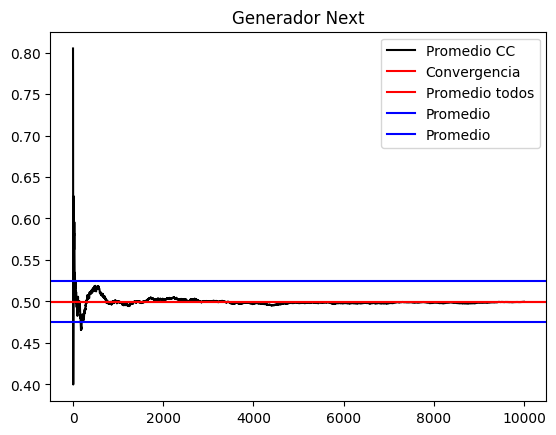

**************************************************


Calculo de Convergencia: 100%|██████████| 10000/10000 [01:27<00:00, 114.79it/s]


0.8048877716064453
9.488
2.105
Aceptamos hipotesis que los numeros vienen de una distribucion uniforme
Aceptamos hipotesis que los numeros vienen de una distribucion uniforme, con un valor de X² 9.308 inferior al valor de la tabla 16.919
1.36
[0.8048877716064453, 0.7273225784301758, 0.07281684875488281, 0.4952821731567383, 0.2650623321533203, 0.03423786163330078, 0.6159992218017578, 0.8598146438598633, 0.8600025177001953, 0.9876375198364258, 0.2314472198486328, 0.9333314895629883, 0.4647083282470703, 0.7125215530395508, 0.7941608428955078, 0.8408327102661133, 0.9541797637939453, 0.3338899612426758, 0.1791400909423828, 0.7073183059692383, 0.2034168243408203, 0.9767427444458008, 0.2613849639892578, 0.6577882766723633, 0.08741950988769531, 0.7660799026489258, 0.9158954620361328, 0.8172426223754883, 0.4811878204345703, 0.8269014358520508, 0.017671585083007812, 0.3106813430786133, 0.2597217559814453, 0.2842073440551758, 0.4417133331298828, 0.2631044387817383, 0.2980213165283203, 0.262997627

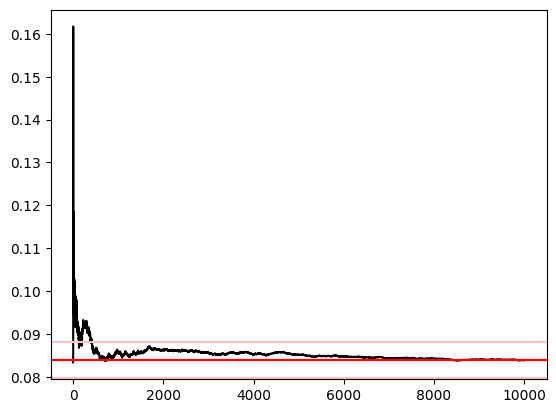

In [1]:
import pandas as pd
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from datetime import datetime
import tqdm as tqdm
url= r"https://raw.githubusercontent.com/juliancastillo-udea/Varios/main/Data/primos.txt"

df = pd.read_csv(url, header=None)
df = df.rename(columns={0:'NumerosPrimos'})
lp = df['NumerosPrimos'].tolist()
print(lp[:5])
a = rnd.choice(lp)
#cuantos congruenciales (pares quiero)
cantidad = 10
m =2**20
congruentes = []
for i in range(cantidad):
    congruentes.append(a+i*m)
print(congruentes)
pares = []
for c in congruentes:
    if (a % m == c % m) and (a!=c):
        par = [a,c]
        pares.append(par)
print(pares)
def Next(x0, a, c, m, numeros=10000):
    error = '0 errores'
    x, r = [],[]
    x.append(x0)
    for i in range(1, numeros+1):
        n = (a*x[i-1]+c)
        n = n % m
        x.append(n)
        r.append(n/m)
        if x[i-1] == x[i]:
            error = f'Termina por secuencia repetida, luego de {i} repeticiones'
            break
    return r, x, 'Next', error
print('*'*100)
x0 = 749453
a = 751183
c = 5994063
generator = Next(x0,a,c,m)
print(f'Semilla : {x0}')
print(f'Constante multiplicativa : {a}')
print(f'Constante aditiva : {c}')
print(f'Modulo (M) : {m}')

uniformidadt = 1/2
varianzat = 1/12
promedio = st.mean(generator[0])
varianza = st.variance(generator[0])
print(f'El promedio teorico es : {uniformidadt:,.4f}')
print(f'El promedio calculado es : {promedio:,.4f}')
print(f'La varianza teorica es : {varianzat:,.4f}')
print(f'La varianza calculada es : {varianza:,.4f}')
print(f'La diferencia (error) entre el promedio calculado y el otro es:')
print(f'\t{abs(promedio-uniformidadt):,.4f}')
print(f'La diferencia (error) entre la varianza calculada y la otra es:')
print(f'\t{abs(varianza-varianzat):,.4f}')

from tqdm import tqdm
temp = []
promedio = []
for i in tqdm(generator[0], desc='Calculo de Convergencia'):
    temp.append(i)
    promedio.append(st.mean(temp))
plt.plot(promedio, color='black', label='Promedio CC')
plt.axhline(promedio[-1], color='red', label='Convergencia')
plt.axhline(st.mean(temp), color='red', label='Promedio todos')
plt.axhline(promedio[-1]*0.95, color='blue', label='Promedio')
plt.axhline(promedio[-1]*1.05, color='blue', label='Promedio')
plt.legend()
plt.title("Generador Next")
plt.show()
print('*'*50)

temp = []
varianza = []
for i in tqdm(generator[0], desc='Calculo de Convergencia'):
    temp.append(i)
    if len(temp)>2:
        varianza.append(st.variance(temp))
    else:
        varianza.append(1/12)
plt.plot(varianza, color='black', label='varianza Var')
plt.axhline(varianza[-1], color='red', label='Convergencia')
plt.axhline(st.variance(temp), color='red', label='Varianza Todos')
plt.axhline(varianza[-1]*0.95, color='pink', label='Convergencia')
plt.axhline(varianza[-1]*1.05, color='pink', label='Convergencia')

randomJuan = iter(generator[0])

print(next(randomJuan))

y = generator[0]



filename = r"https://raw.githubusercontent.com/juliancastillo-udea/2023-02-Simulacion/main/Unidad2/ChiCuadrado.csv"
data = pd.read_csv(filename, sep=',', usecols=["GradosLibertad", "Alfa0.05"], index_col ='GradosLibertad')
data.head(7)

chi2 = data.loc[5-1]
chi2 = chi2[0]
print(chi2)

#Prueba
aleatorios = y.copy()
k = 5 #Clases 5
Ei = len(aleatorios)/k #Cuantos hay por clase teoricamente
n = len(aleatorios) # Cantidad de objetos, datos
Oi = [0,0,0,0,0]
#Oi = [0]*5
#     r1,r2,r3,r4,r5 --> [0,0.2], (0.2, 0.4]...
#Clasificar los Numeros aleatorios
for x in aleatorios:
    if x > 4/5:
        Oi[0] += 1
    elif x > 3/5:
        Oi[1] += 1
    elif x > 2/5:
        Oi[2] += 1
    elif x > 1/5:
        Oi[3] += 1
    else:
        Oi[4] += 1
X2 = 0
for z in range(k): #Recorro las clases
    X2 += (((Oi[z] - Ei)**2)/Ei) #Calculo los valores para X2
print(X2)

if X2 < chi2: #X2 es el valor acumulado del estadistico, chi2 es el valor maximo tolerable por tabla
    print('Aceptamos hipotesis que los numeros vienen de una distribucion uniforme')
else:
    print('Rechazamos hipotesis que los numeros vienen de una distribucion uniforme')



chi2 = data.loc[10-1] #Posicion 10-1
chi2 = chi2[0]
#Vamos a generar una cantidad de numeros aleatorios por ejemplo 100
#Aleatorios sigue siendo el mismo valor
k = 10
Ei = len(aleatorios)/k
n = len(aleatorios)
#Vamos a clasificar los datos
Oi = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
X2 = 0
#Tenemos 10 clases en las cuales debemos agregar cuando los datos son corresponden a su valor 1/10
for x in aleatorios:
    if x > 9/10:
        Oi[0]+=1
    elif x > 8/10:
        Oi[1]+=1
    elif x > 7/10:
        Oi[2]+=1
    elif x > 6/10:
        Oi[3]+=1
    elif x > 5/10:
        Oi[4]+=1
    elif x > 4/10:
        Oi[5]+=1
    elif x > 3/10:
        Oi[6]+=1
    elif x > 2/10:
        Oi[7]+=1
    elif x > 1/10:
        Oi[8]+=1
    else:
        Oi[9]+=1
#Ya tengo clasificado los datos en las 5 clases, debo iterar en 5 clases a detallar los valores
for z in range(10):
    X2 += (((Oi[z]-Ei)**2)/Ei)
if X2 < chi2:
    print('Aceptamos hipotesis que los numeros vienen de una distribucion uniforme, con un valor de X² {} inferior al valor de la tabla {}'.format(X2, chi2))
else:
    print('Rechazamos hipotesis que los numeros vienen de una distribucion uniforme, con un valor de X² {} inferior al valor de la tabla {}'.format(X2, chi2))

#Cargamos la tabla desde la ruta de GitHub
filename = r'https://raw.githubusercontent.com/juliancastillo-udea/2023-02-Simulacion/main/Unidad2/KolmogorovSmirnov.csv' #RAW -> Crudo
data = pd.read_csv(filename, sep=',', usecols=["TamanioMuestra", "Alfa0.05"], index_col ='TamanioMuestra')
data.head()

ks = data.loc[36] #Posicion 36 para mas de 35 registros
ks = ks[0]
print(ks)

#Los numeros calculados previamente
aleatorios = y.copy()
print(aleatorios)

#Debemos generar un listado de la misma cantidad de datos entre 0 y 1 equidistribuidos
b = np.arange(0,1,1/10000)
b = list(b)
print(len(b), b)

aleatorios.sort()
print(aleatorios)

dmas, dmenos = [], []
N = len(aleatorios)
kolsmi = ks/(N**(1/2))
print(kolsmi)

N = len(aleatorios)
for x in range(len(aleatorios)):
    i=x
    Ri = aleatorios[x]
    #+++++++++++++++++++++++++++++++
    dma = (i/N)-Ri
    dmas.append(dma)
    #-------------------------------
    dme = Ri-((i-1)/N)
    dmenos.append(dme)
    ################################
D = [max(dmas), max(dmenos)]
q = max(D) # Este es mi valor a comparar
kolsmi = ks/(N**(1/2))
print('kolsmi',kolsmi)
print('q',q)
if q < kolsmi:
    print('Sisas, sobelo con chillelo los numeros son uniformemente distribuidos')
else:
    print('RECHAZOOOOOO, no son uniformemente distribuidos')

print(q)

numerosaleatorios = [0.12,0.01,0.23,0.28,0.89,0.31,0.64,0.28,0.83,0.93,0.99,0.15,0.33,0.35,0.91,0.41,0.60,0.27,0.75,0.88,0.68,0.49,0.05,0.43,0.95,0.58,0.19,0.36,0.69,0.87]
print(numerosaleatorios)


numA = y.copy()

def guardar_rachas_ascendentes_descendentes(x):
    rachas = []
    tipo_actual = None
    contador_racha = 0

    for i in range(1, len(x)):
        if x[i] > x[i-1]:
            tipo_nuevo = "↑"
        elif x[i] < x[i-1]:
            tipo_nuevo = "↓"
        else:
            tipo_nuevo = tipo_actual

        if tipo_actual == tipo_nuevo:
            contador_racha += 1
        else:
            if tipo_actual is not None:
                rachas.append((tipo_actual, contador_racha))
            contador_racha = 1
            tipo_actual = tipo_nuevo

    if tipo_actual is not None:
        rachas.append((tipo_actual, contador_racha))

    return rachas

x = y.copy()
rachas = guardar_rachas_ascendentes_descendentes(x)
print(len(rachas))
print(rachas)
criterio = 1.96
media = (2*len(x))/3
varianza = (16*len(x)-29)/90
z = (len(rachas) - media)/varianza
if z > -1.96 and z < 1.96:
    print('H0--> Que la lista de # aleatorios se distribuyen independientemente')
else:
    print('H1--> Que la lista de # aleatorios no se distribuyen independientemente')


def guardar_rachas_por_encima_debajo_media(x, media=0.5):
    rachasup = []
    rachasdown = []
    tipo_actual = "↑" if x[0] > media else "↓"
    contador_racha = 1
    for i in range(1, len(x)):
        if x[i] > media:
            tipo_nuevo = "↑"
        else:
            tipo_nuevo = "↓"
        if tipo_actual == tipo_nuevo:
            contador_racha += 1
        else:
            if tipo_actual == "↑":
                rachasup.append((tipo_actual, contador_racha))
            else:
                rachasdown.append((tipo_actual, contador_racha))
            contador_racha = 1
            tipo_actual = tipo_nuevo
    #La ultima racha
    if tipo_actual == "↑":
        rachasup.append((tipo_actual, contador_racha))
    else:
        rachasdown.append((tipo_actual, contador_racha))
    return (rachasup, rachasdown)

x = y.copy()
rachasup, rachasdown = guardar_rachas_por_encima_debajo_media(x)
print("↑", len(rachasup))
print("↓", len(rachasdown))


# criterio = 1.96
print(rachasup)
print(rachasdown)
ru=0
for i in rachasup: ru+=i[1]
print(ru)
rd=0
for i in rachasdown: rd+=i[1]
print(rd)
media = 2*ru*rd
media = media/(ru+rd)
varianza = 2*ru*rd*(2*ru*rd-ru-rd)
varianza = varianza / (((ru+rd)**2)*(ru+rd-1))

z = ((len(rachasup)+len(rachasdown)) - media)/varianza
if z > -1.96 and z < 1.96:
    print('H0--> Que la lista de # aleatorios se distribuyen independientemente')
else:
    print('H1--> Que la lista de # aleatorios no se distribuyen independientemente')